# EEG based Brain-Computer Interface using Visual Imagery 

## Computational Cognitive Neuroscience 2020/2021

### Decoding analysis using time-frequency features with SVM, LR, LDA, RF
### In this notebook, features are extracted when noise and artifact removal are not applied. Only occipital channels are considered

### Import Libraries

In [1]:
%%capture libraries   

import sys
import os
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install mne
!{sys.executable} -m pip install mne-features
import numpy as np
import matplotlib 
import pathlib
import mne
import seaborn as sns
import pandas as pd
from mne.io import concatenate_raws, read_raw_edf
from mne import Epochs, create_info, events_from_annotations
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs,corrmap
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch, tfr_stockwell,tfr_multitaper,tfr_array_morlet,AverageTFR
from scipy import signal
from scipy.integrate import simps
matplotlib.use('Qt5Agg') #allow interactive plots
import matplotlib.pyplot as plt
from mne.decoding import GeneralizingEstimator, Scaler,cross_val_multiscore, LinearModel, get_coef, Vectorizer, CSP, SlidingEstimator
from mne.viz import centers_to_edges
from mne.baseline import rescale
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, precision_recall_curve, average_precision_score, plot_precision_recall_curve, ConfusionMatrixDisplay, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_roc_curve, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
%SM1.ipynb import load_data, excl_chan, filter_data, make_epochs, plot_data, epochs_power

### Compare the four classifiers when the features are extracted from non-preprocessed data (NO ICA and Bad Epochs Rejections performed)

In [2]:
raw_datasets = load_data(os.getcwd()); #raw 30 sessions in .edf format will be uploaded

include_channels = ['O1','O2']
excl_chan(raw_datasets) #remove the channels not included in the above list

filter_data(raw_datasets) #filter between 1-30 Hz

epoched_data=make_epochs(raw_datasets, 10)  #create epochs

print(epoched_data.get_data().shape) #the final shape is n_epochs, chans, samples 

Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe03_03.02.21_08.33.04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45311  =      0.000 ...   176.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe14_11.02.21_08.36.41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 45567  =      0.000 ...   177.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe29_19.02.21_08.40.08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44543  =      0.000 ...   173.996 secs...
Extracting EDF parameters from /Users/ile/Documents/BCI_dataset/Giuseppe17_12.02.21_08.44.40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 44799  =      0.000 ...   174.996 secs...
Extracting EDF parameters from /Users/ile/Do

- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff f

- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 845 samples (3.301 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter

0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
30 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
40 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
50 matching event

0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
260 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
270 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 2560 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching ev

In [3]:
#Repeat the same procedure, extract features from non-preprocessed data

freqs = np.logspace(*np.log10([2, 30]), num=40) # define frequencies of interest (log-spaced) 
n_cycles = freqs / 2.  # different number of cycle per frequency

power_dec = mne.time_frequency.tfr_morlet(epoched_data, freqs=freqs, n_cycles=n_cycles, use_fft=True, average=False,
                                           return_itc=False, decim=3, n_jobs=1)  
 

print(power_dec.data.shape)
 

Not setting metadata
(300, 2, 40, 811)


In [4]:
# Features in Theta band 4-7Hz

n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows


theta_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))  
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan):
        pow_t = power_dec.data[samples][chan][(power_dec.freqs>=4) & (power_dec.freqs<7)][:]  
        counter+=1
        pow_avg_t = np.mean(pow_t, axis=0) 
        theta_pow_dec[samples,chan,:]=pow_avg_t

In [5]:
#Features Alpha band 8-12Hz


n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows

alpha_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))   
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan): 
        pow_a = power_dec.data[samples][chan][(power_dec.freqs>=8) & (power_dec.freqs<12)][:]  
        counter+=1
        pow_avg_a = np.mean(pow_a, axis=0)  
        alpha_pow_dec[samples,chan,:]=pow_avg_a  
        

In [6]:
#Beta band

n_col= power_dec.data.shape[3] #extract n columns from pw output
n_chan=power_dec.data.shape[1] #extract n channels
n_row= power_dec.data.shape[0] #extract n rows

beta_pow_dec = np.zeros(shape=(n_row,n_chan,n_col))    
counter=0
for samples in range (0,n_row):
    for chan in range(0, n_chan): 
        pow_b = power_dec.data[samples][chan][(power_dec.freqs>=13) & (power_dec.freqs<30)][:]  
        counter+=1
        pow_avg_b = np.mean(pow_b, axis=0)  
        beta_pow_dec[samples,chan,:]=pow_avg_b

Firstly, initialise the below variables to store the accuracies from all classifiers:

In [7]:
accuracies, f1_scores = [], [] #run this cell only once

In [8]:
data= alpha_pow_dec  # theta_pow_dec, alpha_pow_dec, beta_pow_dec
labels = epoched_data.events[:,-1] 
#Define training and testing
train_data, test_data, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=173)

### Define the Support Vector Machine(SVM)

In [9]:
clf_svm_pip = make_pipeline(Vectorizer(), StandardScaler(), svm.SVC(probability=True))  #define pipeline
parameters = {'svc__kernel':['rbf', 'sigmoid'], 'svc__C':[0.1, 1, 10], 'svc__gamma':[0.1,0.01,0.001]}
#Apply GridSearchCV to identify the best parameters
gs_cv_svm = GridSearchCV(clf_svm_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=10), return_train_score=True) 

#Training is done by passing the training data and their labels to fit() function.

gs_cv_svm.fit(train_data, labels_train)
print('Best Parameters: {}'.format(gs_cv_svm.best_params_))
print('Best Score: {}'.format(gs_cv_svm.best_score_))


predictions_svm = gs_cv_svm.predict(test_data)

#Evaluate
report_svm = classification_report(labels_test, predictions_svm, target_names=['Relax', 'Push'])
print('SVM Clasification Report:\n {}'.format(report_svm))

acc_svm = accuracy_score(labels_test, predictions_svm)
print("Accuracy of SVM model: {}".format(acc_svm))

precision_svm,recall_svm,fscore_svm,support_svm=precision_recall_fscore_support(labels_test,predictions_svm,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_svm,recall_svm,fscore_svm))

Best Parameters: {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}
Best Score: 0.6714285714285715
SVM Clasification Report:
               precision    recall  f1-score   support

       Relax       0.65      0.36      0.47        47
        Push       0.53      0.79      0.64        43

    accuracy                           0.57        90
   macro avg       0.59      0.58      0.55        90
weighted avg       0.60      0.57      0.55        90

Accuracy of SVM model: 0.5666666666666667
Precision: 0.5925480769230769, Recall: 0.5761999010390896, f1-score:0.5506337216745615


In [18]:
#Area Under Curve (AUC) value
auc = roc_auc_score(labels_test, predictions_svm)
print('ROC AUC: %f' % auc)

ROC AUC: 0.576200


In [10]:
#ROC result
svm_roc = plot_roc_curve(gs_cv_svm, test_data, labels_test)  

In [11]:
#Precision-Recall result
svm_pr = plot_precision_recall_curve(gs_cv_svm, test_data, labels_test) #precision-recall curve

In [12]:
# Performance metrics
errors_svc = abs(predictions_svm - labels_test)
print('Average absolute error:', round(np.mean(errors_svc), 2), 'degrees.')

Average absolute error: 0.43 degrees.


### Linear Discriminant Analysis (LDA)

In [13]:
clf_lda_pip = make_pipeline(Vectorizer(), StandardScaler(), LinearDiscriminantAnalysis())
parameters = {'lineardiscriminantanalysis__solver':['svd']}
gs_cv_lda = GridSearchCV(clf_lda_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=10), return_train_score=True) 
gs_cv_lda.fit(train_data,labels_train)
 
print('Best Parameters: {}'.format(gs_cv_lda.best_params_))
print('Best Score: {}'.format(gs_cv_lda.best_score_))


#Predictions
predictions_lda = gs_cv_lda.predict(test_data)

#Evaluation
report_lda = classification_report(labels_test, predictions_lda, target_names=['Relax', 'Push'])
print('LDA Clasification Report:\n {}'.format(report_lda))

acc_lda = accuracy_score(labels_test, predictions_lda)
print("Accuracy of LDA model: {}".format(acc_lda))

precision_lda,recall_lda,fscore_lda,support_lda=precision_recall_fscore_support(labels_test,predictions_lda,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_lda,recall_lda,fscore_lda))

Best Parameters: {'lineardiscriminantanalysis__solver': 'svd'}
Best Score: 0.4904761904761904
LDA Clasification Report:
               precision    recall  f1-score   support

       Relax       0.51      0.40      0.45        47
        Push       0.47      0.58      0.52        43

    accuracy                           0.49        90
   macro avg       0.49      0.49      0.49        90
weighted avg       0.49      0.49      0.49        90

Accuracy of LDA model: 0.4888888888888889
Precision: 0.49260581336053033, Recall: 0.4928253339930727, f1-score:0.4866071428571429


In [14]:
#Area Under Curve (AUC) value
auc = roc_auc_score(labels_test, predictions_lda)
print('ROC AUC: %f' % auc)

ROC AUC: 0.492825


In [15]:
#ROC 
lda_roc = plot_roc_curve(gs_cv_lda, test_data, labels_test) 

In [16]:
#Precision-Recall 
lda_pr = plot_precision_recall_curve(gs_cv_lda,test_data, labels_test)  

In [17]:
# Performance metrics
errors_lda = abs(predictions_lda - labels_test)
print('Average absolute error:', round(np.mean(errors_lda), 2), 'degrees.')

Average absolute error: 0.51 degrees.


### Logistic Regression (LR)

In [19]:
clf_lr_pip = make_pipeline(Vectorizer(), StandardScaler(), LogisticRegression(max_iter=5000))
parameters ={'logisticregression__C': np.logspace(0, 4, 100)}  


gs_cv_lr = GridSearchCV(clf_lr_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=10))
gs_cv_lr.fit(train_data, labels_train)

print('Best Parameters: {}'.format(gs_cv_lr.best_params_))
print('Best Score: {}'.format(gs_cv_lr.best_score_))

#Predictions
predictions_lr = gs_cv_lr.predict(test_data)

#Evaluation
report_lr = classification_report(labels_test, predictions_lr, target_names=['Relax', 'Push'])
print('LR Clasification Report:\n {}'.format(report_lr))

acc_lr = accuracy_score(labels_test, predictions_lr)
print("Accuracy of LR model: {}".format(acc_lr))

precision_lr,recall_lr,fscore_lr,support_lr=precision_recall_fscore_support(labels_test,predictions_lr,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_lr,recall_lr,fscore_lr))

Best Parameters: {'logisticregression__C': 11.233240329780276}
Best Score: 0.5571428571428572
LR Clasification Report:
               precision    recall  f1-score   support

       Relax       0.46      0.38      0.42        47
        Push       0.43      0.51      0.47        43

    accuracy                           0.44        90
   macro avg       0.45      0.45      0.44        90
weighted avg       0.45      0.44      0.44        90

Accuracy of LR model: 0.4444444444444444
Precision: 0.4464555052790347, Recall: 0.44730331519049976, f1-score:0.44334487877288475


In [20]:
#Area Under Curve (AUC) value
auc = roc_auc_score(labels_test, predictions_lr)
print('ROC AUC: %f' % auc)

ROC AUC: 0.447303


In [21]:
#ROC
lr_roc = plot_roc_curve(gs_cv_lr, test_data, labels_test)  

In [22]:
#Precision
lr_pr = plot_precision_recall_curve(gs_cv_lr, test_data, labels_test)  

In [23]:
# Performance metrics
errors_lr = abs(predictions_lr - labels_test)
print('Average absolute error:', round(np.mean(errors_lr), 2), 'degrees.')

Average absolute error: 0.56 degrees.


### Random Forest (RF)

In [24]:
clf_rf_pip = make_pipeline(Vectorizer(), StandardScaler(), RandomForestClassifier()) 
parameters = {'randomforestclassifier__n_estimators':[100,200,300,400,500,600,700], 'randomforestclassifier__criterion':['gini','entropy'], 'randomforestclassifier__max_depth':[1,2,3,4,5]} 
gs_cv_rf = GridSearchCV(clf_rf_pip, parameters, scoring='accuracy', cv=StratifiedKFold(n_splits=10), return_train_score=True)  
gs_cv_rf.fit(train_data,labels_train)

print('Best Parameters: {}'.format(gs_cv_rf.best_params_))
print('Best Score: {}'.format(gs_cv_rf.best_score_))

predictions_rf = gs_cv_rf.predict(test_data)

#Evaluation
report_rf = classification_report(labels_test, predictions_rf, target_names=['Relax', 'Push'])
print('RF Clasification Report:\n {}'.format(report_rf))

acc_rf = accuracy_score(labels_test, predictions_rf)
print("Accuracy of RF model: {}".format(acc_rf))

precision_rf,recall_rf,fscore_rf,support_rf=precision_recall_fscore_support(labels_test,predictions_rf,average='macro')
print('Precision: {0}, Recall: {1}, f1-score:{2}'.format(precision_rf,recall_rf,fscore_rf))

Best Parameters: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 300}
Best Score: 0.6571428571428571
RF Clasification Report:
               precision    recall  f1-score   support

       Relax       0.67      0.30      0.41        47
        Push       0.52      0.84      0.64        43

    accuracy                           0.56        90
   macro avg       0.59      0.57      0.53        90
weighted avg       0.60      0.56      0.52        90

Accuracy of RF model: 0.5555555555555556
Precision: 0.5942028985507246, Recall: 0.5675408213755566, f1-score:0.5273109243697479


In [25]:
#Area Under Curve (AUC) value
auc = roc_auc_score(labels_test, predictions_rf)
print('ROC AUC: %f' % auc)

ROC AUC: 0.567541


In [26]:
#ROC
rf_roc = plot_roc_curve(gs_cv_rf, test_data, labels_test) 

In [27]:
#Precision
rf_pr = plot_precision_recall_curve(gs_cv_rf, test_data, labels_test)  

In [28]:
# Performance metrics
errors_rf = abs(predictions_rf - labels_test)
print('Average absolute error:', round(np.mean(errors_rf), 2), 'degrees.')

Average absolute error: 0.44 degrees.


Store the classifier performance:

In [29]:
accuracies.append([acc_svm, acc_lda, acc_lr, acc_rf])
f1_scores.append([fscore_svm, fscore_lda, fscore_lr, fscore_rf ])

### ROC Curve comparison


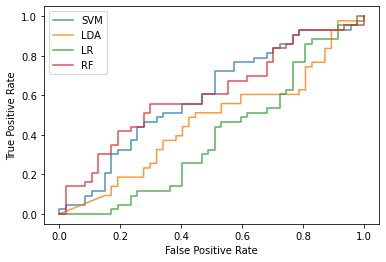

In [30]:
%matplotlib inline

ax = plt.gca()

svm_roc.plot(ax=ax, alpha=0.8,label='SVM')
lda_roc.plot(ax=ax, alpha=0.8,label='LDA')        
lr_roc.plot(ax=ax, alpha=0.8,label='LR')   
rf_roc.plot(ax=ax, alpha=0.8,label='RF')

 
plt.legend()
plt.show()

### Precision-Recall Curve comparison


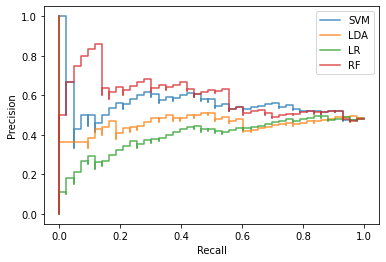

In [31]:
#%matplotlib inline

ax = plt.gca()

svm_pr.plot(ax=ax, alpha=0.8,label='SVM')
lda_pr.plot(ax=ax, alpha=0.8,label='LDA')
lr_pr.plot(ax=ax, alpha=0.8,label='LR')
rf_pr.plot(ax=ax, alpha=0.8,label='RF')

plt.legend()
plt.show()

### Compare the performance of these four different models (Accuracy & F1-score)

In [32]:
print(np.shape(accuracies)) #the final shape should be (3,4)
accuracies

(1, 4)


[[0.5666666666666667,
  0.4888888888888889,
  0.4444444444444444,
  0.5555555555555556]]

In [ ]:
# Plot Accuracy scores
# Choose the height of the bars
barWidth = 0.2


bars1 = [row[0] for row in accuracies ]  #svm
bars2 = [row[1] for row in accuracies ]  #lda
bars3 = [row[2] for row in accuracies ]  #lr
bars4 = [row[3] for row in accuracies ]  #rf
 


# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Create the bars
ax = plt.axes()
plt.bar(r1, bars1, color='#87CEFA', width=barWidth, edgecolor='white', label='SVM')
plt.bar(r2, bars2, color='#FFE4E1', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r3, bars3, color='#CD5C5C', width=barWidth, edgecolor='white', label='LR')
plt.bar(r4, bars4, color='#C5E384', width=barWidth, edgecolor='white', label='RF')

plt.axhline(y=0.5, color='k', linestyle='--',linewidth=0.4)
#plt.axhline(y=0.6, color='r', linestyle='--',linewidth=0.4)
plt.xlabel('Classification Tasks')
plt.ylabel(' Accuracies')
ax.set_xticks([0.3,1.3,2.3])
ax.set_xticklabels(['Theta','Alpha','Beta'])
plt.legend(loc="upper left", bbox_to_anchor=(0.98, 1))

plt.show()

In [ ]:
# Plot F1-scores
# Choose the height of the bars
barWidth = 0.2


bars1 = [row[0] for row in f1_scores ] #svm
bars2 = [row[1] for row in f1_scores ] #lda
bars3 = [row[2] for row in f1_scores ] #lr
bars4 = [row[3] for row in f1_scores ] #rf
 

# The x position of bars

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Create the bars
ax = plt.axes()
plt.bar(r1, bars1, color='#87CEFA', width=barWidth, edgecolor='white', label='SVM')
plt.bar(r2, bars2, color='#FFE4E1', width=barWidth, edgecolor='white', label='LDA')
plt.bar(r3, bars3, color='#CD5C5C', width=barWidth, edgecolor='white', label='LR')
plt.bar(r4, bars4, color='#C5E384', width=barWidth, edgecolor='white', label='RF')

plt.axhline(y=0.5, color='k', linestyle='--',linewidth=0.4)
#plt.axhline(y=0.6, color='r', linestyle='--',linewidth=0.4)
plt.xlabel('Classification Tasks')
plt.ylabel(' F1-scores')
ax.set_xticks([0.3,1.3,2.3])
ax.set_xticklabels(['Theta','Alpha','Beta'])
plt.legend(loc="upper left", bbox_to_anchor=(0.98, 1))

plt.show()